In [32]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [53]:
# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')
# Drop the rows with missing values
titanic.dropna(inplace=True)
titanic.head()
# convert pclass to string
titanic['pclass'] = titanic['pclass'].apply(str)
titanic = titanic.drop(
    [
        'alive', 'who', 'adult_male',
        'class', 'deck','embark_town',
        "embarked"
    ],
    axis=1
)
titanic.head()
# Convert categorical variables into dummy variables
titanic = pd.get_dummies(titanic, drop_first=True)
titanic.head()
# titanic.shape
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    titanic.drop('survived', axis=1),
    titanic['survived'],
    test_size=0.2, random_state=0
)
# Create the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8648648648648649


In [52]:
titanic.head(10)

,survived,age,sibsp,parch,fare,alone,pclass_2,pclass_3,sex_male
1,1,38.0,1,0,71.2833,False,0,0,0
3,1,35.0,1,0,53.1000,False,0,0,0
6,0,54.0,0,0,51.8625,True,0,0,1
10,1,4.0,1,1,16.7000,False,0,1,0
11,1,58.0,0,0,26.5500,True,0,0,0
21,1,34.0,0,0,13.0000,True,1,0,1
23,1,28.0,0,0,35.5000,True,0,0,1
27,0,19.0,3,2,263.0000,False,0,0,1
52,1,49.0,1,0,76.7292,False,0,0,0
54,0,65.0,0,1,61.9792,False,0,0,1


In [45]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

<AxesSubplot:>

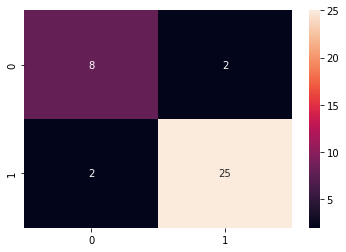

In [46]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [21]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=